<h1 style="color:rgba(37, 214, 191, 1);">IMPORTS</h1>

In [140]:
# Todos los imports necesitados en todo el notebook (No hay imports en otras celdas)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

<h1 style="color:rgba(187, 32, 187, 1);">OBSERVACIONES DEL DATASET</h2>

## 1 Preparación del conjunto de datos

### 1.1 Carga del data frame y visualización de datos

In [141]:
# Cargamos el dataset en nuestro dataframe df
df = pd.read_excel("Churn.xlsx")

# Mostramos el nuestro dataset
df

,id,longdist,internat,local,int_disc,billtype,age,gender,marital,children,est_inco,car,pay_Bank,pay_CreditCard,pay_Cash,churn
0,1,27.09360,0.00000,39.73570,0,1,35,1,1,0,77680.0,0,0,1,0,0
1,2,10.04270,0.00000,46.31180,0,0,53,0,0,1,37111.5,1,1,0,0,0
2,3,23.76050,0.00000,68.35120,1,1,65,1,1,1,37079.4,0,1,0,0,0
3,4,9.39559,0.00000,13.90030,0,0,90,0,0,2,81997.0,0,0,0,1,0
4,5,14.15420,0.00000,108.43300,1,0,39,1,0,0,16829.6,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,4427,28.82390,0.00000,37.06860,0,1,33,0,0,1,53883.9,0,1,0,0,0
4427,4428,4.58844,7.66264,8.49107,0,1,95,0,0,0,38872.3,0,0,1,0,1
4428,4429,10.87920,0.00000,47.65520,1,1,94,1,0,2,49724.1,0,0,1,0,1
4429,4430,16.18920,0.00000,24.43020,0,1,34,0,1,2,14794.3,1,0,1,0,0


In [142]:
# Vamos a modficiar nuestro dataset a nuestro gusto

# Lo primero de todo es igualar las columnas a unidades
cols_to_scale = ['longdist', 'internat', 'local', 'age', 'est_inco']
scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Ahora vamos a utilizar la columna id como índice del dataframe (aunque es muy parecido)
df.set_index('id', inplace=True)

# Visualizamos como ha quedado nuestro dataframe
df

,longdist,internat,local,int_disc,billtype,age,gender,marital,children,est_inco,car,pay_Bank,pay_CreditCard,pay_Cash,churn
id,,,,,,,,,,,,,,,
1,1.432886,-0.374036,-0.212731,0,1,-0.988076,1,1,0,0.963206,0,0,1,0,0
2,-0.382767,-0.374036,-0.092431,0,0,-0.199809,0,0,1,-0.463475,1,1,0,0,0
3,1.077963,-0.374036,0.310748,1,1,0.325702,1,1,1,-0.464604,0,1,0,0,0
4,-0.451674,-0.374036,-0.685352,0,0,1.420516,0,0,2,1.115023,0,0,0,1,0
5,0.055043,-0.374036,1.043987,1,0,-0.812905,1,0,0,-1.176733,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4427,1.617136,-0.374036,-0.261522,0,1,-1.075661,0,0,1,0.126363,0,1,0,0,0
4428,-0.963560,3.052751,-0.784306,0,1,1.639479,0,0,0,-0.401553,0,0,1,0,1
4429,-0.293693,-0.374036,-0.067855,1,1,1.595686,1,0,2,-0.019925,0,0,1,0,1


           longdist      internat         local     int_disc     billtype  \
count  4.431000e+03  4.431000e+03  4.431000e+03  4431.000000  4431.000000   
mean   1.555465e-16  3.207144e-17 -5.692680e-17     0.310765     0.506432   
std    1.000113e+00  1.000113e+00  1.000113e+00     0.462859     0.500015   
min   -1.452156e+00 -3.740359e-01 -9.387387e-01     0.000000     0.000000   
25%   -9.012780e-01 -3.740359e-01 -6.934066e-01     0.000000     0.000000   
50%    4.868003e-03 -3.740359e-01 -2.991001e-01     0.000000     1.000000   
75%    8.988461e-01 -3.740359e-01  3.713036e-01     1.000000     1.000000   
max    1.740455e+00  4.076077e+00  7.303874e+00     1.000000     1.000000   

                age       gender      marital     children      est_inco  \
count  4.431000e+03  4431.000000  4431.000000  4431.000000  4.431000e+03   
mean  -1.218715e-16     0.506432     0.593094     0.989167  9.621432e-17   
std    1.000113e+00     0.500015     0.491312     0.824495  1.000113e+00   
mi

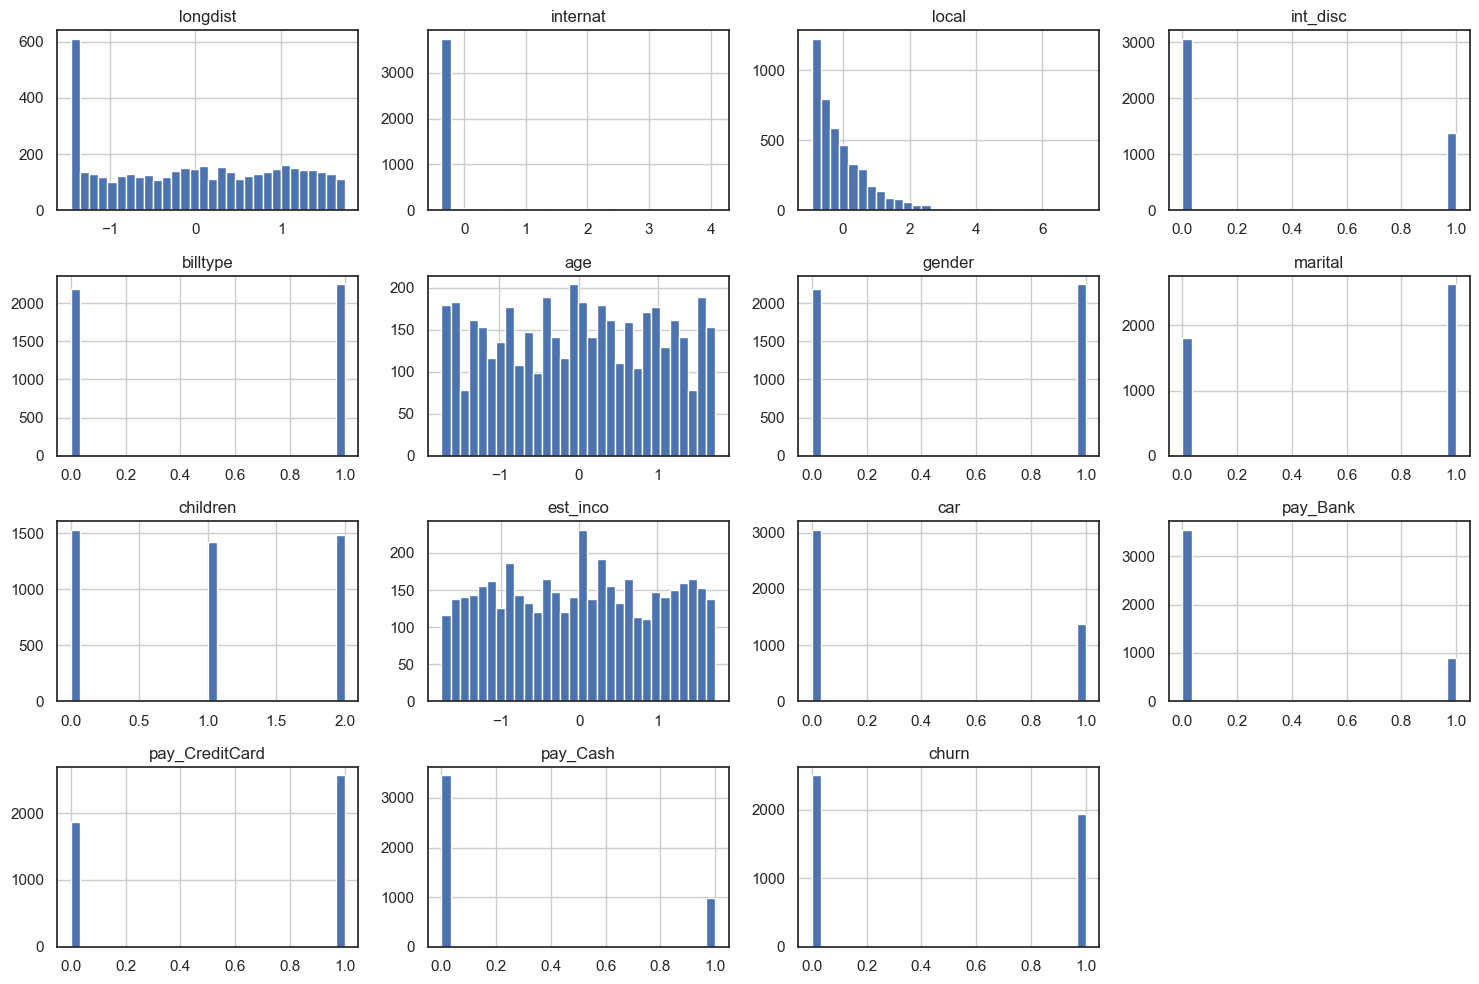

In [143]:
# Visualizamos la distribución de las variables numéricas
print(df.describe())

# Vemos el historgrama
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

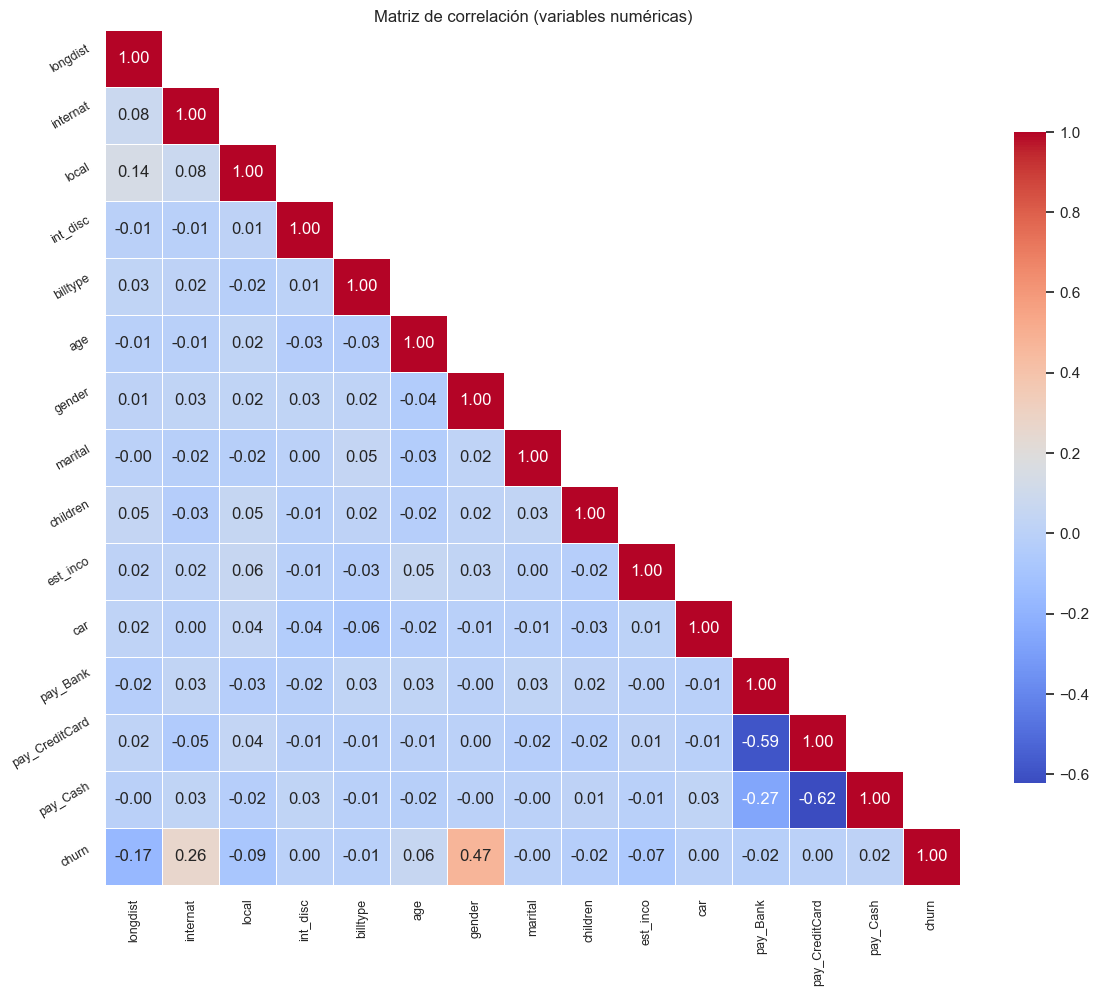

In [144]:
# Visualizamos el Heatmap de correlaciones
corr_matrix = df.corr()

# Enmascaramos el triángulo superior para no duplicar valores
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

plt.figure(figsize=(12, 10))
sns.set(style="white")  # estilo limpio

# Dibujamos el heatmap
ax = sns.heatmap(
    corr_matrix,
    cmap="coolwarm",          # paleta de colores
    annot=True,               # mostrar coeficientes
    mask=mask,                # aplicar máscara
    fmt=".2f",                # formato numérico
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)

# Ajustes de etiquetas
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=9)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30, fontsize=9)

plt.title("Matriz de correlación (variables numéricas)")
plt.tight_layout()
plt.show()

<h1 style="color:rgba(25, 142, 219, 1);">REGRESION LOGÍSTICA</h2>

### 1.2 División del modelo de regresión logística

In [145]:
# Vamos a crear una copia del df solo sin la variable churn para crear la regresión logistica
df_lr = df.drop(columns=["churn"])

# Dividimos el dataset en conjunto de entrenamiento y prueba
X = df_lr
y = df["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

## 2. Entrenamiento del modelo

In [146]:
# Vamos a guardar los valores que queremos en una lista y los resultantes en otra
valores_C = [0.01, 0.1, 1, 10, 100]
resultados = {}

for c in valores_C:
    # Utilizamos regresión logística con penalización L2 (Regularización Ridge)
    model = LogisticRegression(penalty='l2', C=c, solver='lbfgs', max_iter=1000)
    # 5-Fold Cross Validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    resultados[c] = np.mean(scores)

# Mostramos los resultados de cada iteración
for c, score in resultados.items():
    print(f"(C={c}) Accuracy promedio CV: {score:.4f}")

# Sacamos el mejor valor de C en base a los resultados de la "accuracy"
mejor_C = max(resultados, key=resultados.get)
print(f"\nMejor valor de C según CV: {mejor_C}")

(C=0.01) Accuracy promedio CV: 0.7384
(C=0.1) Accuracy promedio CV: 0.7585
(C=1) Accuracy promedio CV: 0.7621
(C=10) Accuracy promedio CV: 0.7616
(C=100) Accuracy promedio CV: 0.7616

Mejor valor de C según CV: 1


In [147]:
# Finalmente entrenamos el modelo con el mejor valor de C
final_model = LogisticRegression(penalty='l2', C=mejor_C, solver='lbfgs')
final_model.fit(X_train, y_train)

LogisticRegression(C=1)

In [148]:
# Sacamos las predicciones sobre el conjunto de prueba
y_pred = final_model.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,

In [149]:
# Sacamos las predicciones sobre el conjunto de prueba
x_predict = final_model.predict(X_train)
x_predict

array([1, 0, 1, ..., 0, 1, 1])

## 3. Evaluación del modelo

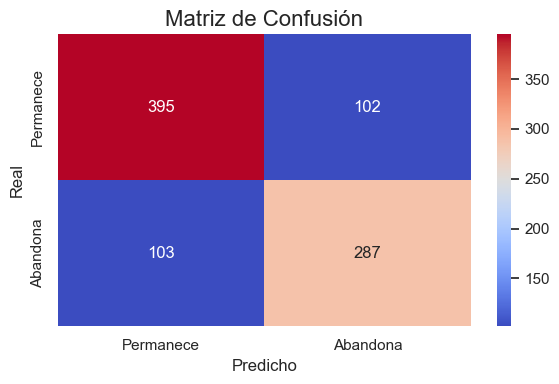

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       497
           1       0.74      0.74      0.74       390

    accuracy                           0.77       887
   macro avg       0.77      0.77      0.77       887
weighted avg       0.77      0.77      0.77       887



In [150]:
# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Etiquetas personalizadas
class_names = ["Permanece", "Abandona"]

# Crear un heatmap con seaborn
plt.figure(figsize=(6, 4))
ax = sns.heatmap(
    cm,
    annot=True,             # Mostrar valores dentro de las celdas
    fmt="d",                # Mostrar números enteros
    cmap="coolwarm",        # Paleta de colores
    xticklabels=class_names,  # Etiquetas personalizadas para el eje X
    yticklabels=class_names   # Etiquetas personalizadas para el eje Y
)

# Agregar títulos y etiquetas
ax.set_title("Matriz de Confusión", fontsize=16)
plt.xlabel("Predicho", fontsize=12)
plt.ylabel("Real", fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Imprimir el reporte de clasificación junto con la matriz de confusión
print(classification_report(y_test,y_pred))


#### Interpretación:
##### Accuracy: Tenemos una accuracy del 0,77, lo que nos indica que de nuestro total de 887 muestras del test hemos acertado el 77%
##### Precision y Recall: En los dos casos tenemos los mismos valores para los dos tipos (0 y 1), ya que el numero de FN y FP son casi exactos, lo que hace que al calcular los valores el numero sea identico, ya que: Recall =  TP / (TP + FN) y Precision =  TP / (TP + FP).
##### F1-score: En el caso del scroe f1, ya que los dos valores de recall y precision son el mismo, f1 va a ser el mismo, ya que: F1-Score = 2*((Recall * Precision) / (Recall + Precision))
##### Matriz de confusión: Como vemos en la propia matriz, en función de porcentajes, nuestro modelo identifica mucho mejor los TN que los TP, ya que hay una mayor cantidad de TN que TP siendo FP y FN basicamente el mismo valor. 
##### En general tenemos un modelo decente que nos precide aproximadamente el 80% de las veces de manera correcta, lo cual no está nada mal para cosas generales.

## 4. Analisis del modelo

In [151]:
# Coeficientes del modelo
coef_df = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente B": final_model.coef_[0]
})

# Ordenar por importancia
coef_df = coef_df.sort_values(by="Coeficiente B", ascending=False).reset_index(drop=True) # Lo del indice es para que tenga sentido el numero con el orden que queremos

# Mostramos los coeficientes de Beta
coef_df

,Variable,Coeficiente B
0,gender,2.515374
1,internat,0.883728
2,age,0.236408
3,pay_Cash,0.099047
4,pay_CreditCard,0.083641
5,car,0.075597
6,children,-0.068486
7,int_disc,-0.111143
8,marital,-0.124168
9,billtype,-0.153816


In [152]:
# Calculamos las probabilidades predichas
probs = final_model.predict_proba(X_test)

# Convertimos en df para mejor visualización
proba_df = pd.DataFrame({
    "Posibilidad_Permanece": probs[:, 0],
    "Probabilidad_Abandona": probs[:, 1]
})

# Mostramos las probabilidades predichas
proba_df


,Posibilidad_Permanece,Probabilidad_Abandona
0,0.048163,0.951837
1,0.912235,0.087765
2,0.897325,0.102675
3,0.108043,0.891957
4,0.408461,0.591539
...,...,...
882,0.819385,0.180615
883,0.921744,0.078256
884,0.970721,0.029279
885,0.878780,0.121220


In [153]:
# Una vez tenemos ya las probabilidades, podemos establecer un umbral diferente al 0.5 para clasificar a los clientes
# Vamos a utilizar un total de 3 umbrales diferentes: 0.3, 0.5 y 0.7
umbrales = [0.3, 0.8, 0.99]

tabla = []

# Hacemos un for para poder ver la cantidad de 0 y 1 en cada umbral que hemos establecido
for umbral in umbrales:
    pred = (probs[:, 1] >= umbral).astype(int)
    uniques, counts = np.unique(pred, return_counts=True)

    pred_0 = counts[uniques.tolist().index(0)] if 0 in uniques else 0
    pred_1 = counts[uniques.tolist().index(1)] if 1 in uniques else 0

    # Métricas por clase → devuelve arrays: [clase_0, clase_1]
    precision = precision_score(y_test, pred, average=None)
    recall = recall_score(y_test, pred, average=None)
    f1 = f1_score(y_test, pred, average=None)

    fila = {
        "Umbral": umbral,
        "Pred_0": pred_0,
        "Pred_1": pred_1,
        "Precision_0": precision[0],
        "Precision_1": precision[1],
        "Recall_0": recall[0],
        "Recall_1": recall[1],
        "F1_0": f1[0],
        "F1_1": f1[1]
    }

    tabla.append(fila)

tabla = pd.DataFrame(tabla)
tabla

,Umbral,Pred_0,Pred_1,Precision_0,Precision_1,Recall_0,Recall_1,F1_0,F1_1
0,0.30,369,518,0.894309,0.677606,0.663984,0.900000,0.762125,0.773128
1,0.80,757,130,0.635403,0.876923,0.967807,0.292308,0.767145,0.438462
2,0.99,883,4,0.561721,0.750000,0.997988,0.007692,0.718841,0.015228


##### En el umbral de 0.3, al tener un umbral muy bajo, el indice de aceptación se dispara, por lo que vemos como el Recall positivo y la precision negativa se dispara, ya que, como hemos visto anteriormente, utiliza los FN para medir su valor Recall =  TP / (TP + FN) y, al tener tan pocos valores que sean 0 es muy complicado que haya un falso negativo, lo mismo pasa a la inversa en la vesión negativa.
##### En el umbral de 0.8, siguiendo la misma logica pero a la inversa, ahora vemos como nuestra Precision positiva y recall negativo suben mucho, ya que, como hemos visto anteriormente, utiliza los FP para su valor Precision =  TP / (TP + FP).
##### Finalmente en el umbral de 0.99, para el caso mas extremo, vemos como el Recall negativo es casi 0, ya que como hay muy pocos 0 nnestro modelo acierta mucho, lo que hace que haya muy poco FN. Por la otra banda no funciona tan bien el Recall ya que estamos aceptando muchos 1, entonces nuestro Recall es horroroso. 

## 5. Visualizaciones

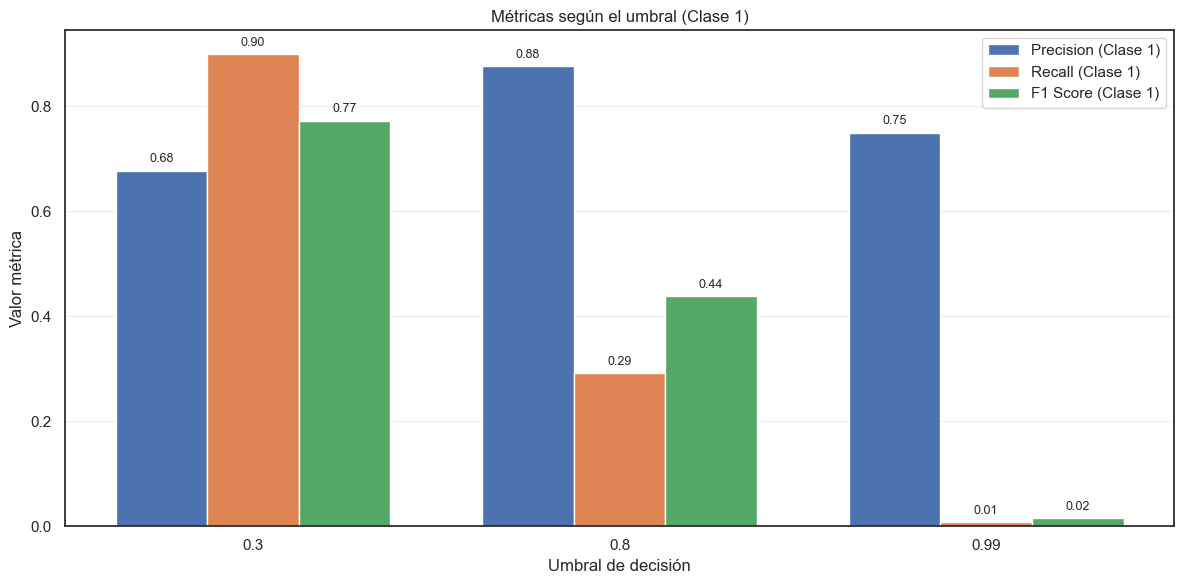

In [154]:
# Visualizamos las métricas para la clase 1 (Abandona) en un gráfico de barras
plt.figure(figsize=(12, 6))

x = np.arange(len(tabla["Umbral"]))
width = 0.25

# Las etiquetas de las barras
bars1 = plt.bar(x - width, tabla["Precision_1"], width, label="Precision (Clase 1)")
bars2 = plt.bar(x, tabla["Recall_1"], width, label="Recall (Clase 1)")
bars3 = plt.bar(x + width, tabla["F1_1"], width, label="F1 Score (Clase 1)")

# Configuraciones del gráfico
plt.xticks(x, tabla["Umbral"])
plt.xlabel("Umbral de decisión")
plt.ylabel("Valor métrica")
plt.title("Métricas según el umbral (Clase 1)")
plt.legend()
plt.grid(axis="y", alpha=0.3)

# Agregar valores encima de las barras
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

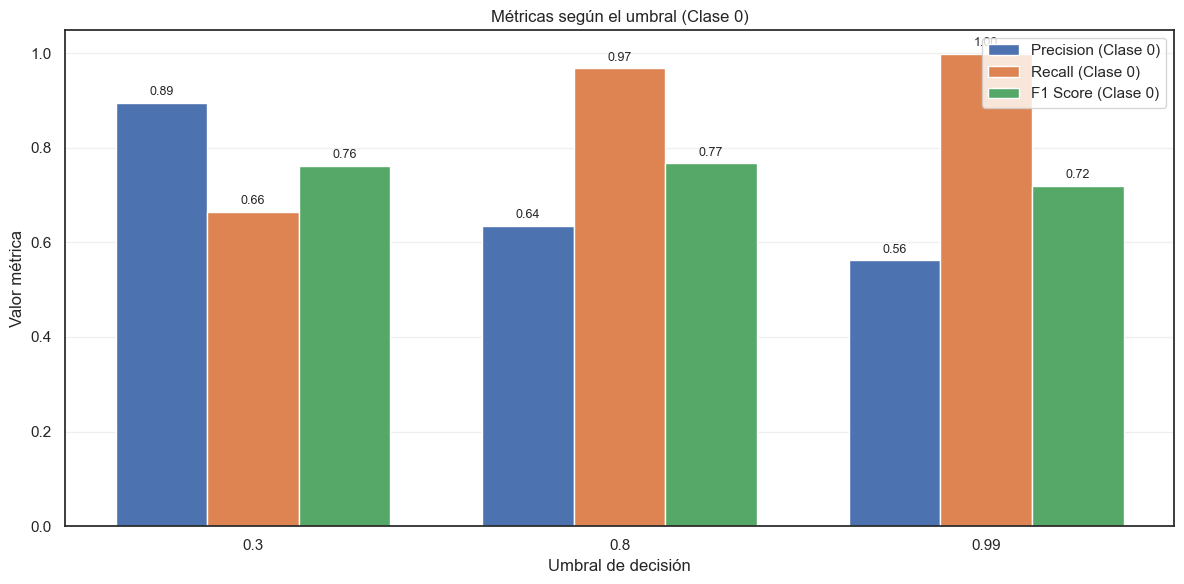

In [155]:
# Visualizamos las métricas para la clase 1 (Abandona) en un gráfico de barras
plt.figure(figsize=(12, 6))

x = np.arange(len(tabla["Umbral"]))
width = 0.25

# Las etiquetas de las barras
bars1 = plt.bar(x - width, tabla["Precision_0"], width, label="Precision (Clase 0)")
bars2 = plt.bar(x, tabla["Recall_0"], width, label="Recall (Clase 0)")
bars3 = plt.bar(x + width, tabla["F1_0"], width, label="F1 Score (Clase 0)")

# Configuraciones del gráfico
plt.xticks(x, tabla["Umbral"])
plt.xlabel("Umbral de decisión")
plt.ylabel("Valor métrica")
plt.title("Métricas según el umbral (Clase 0)")
plt.legend()
plt.grid(axis="y", alpha=0.3)

# Agregar valores encima de las barras
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

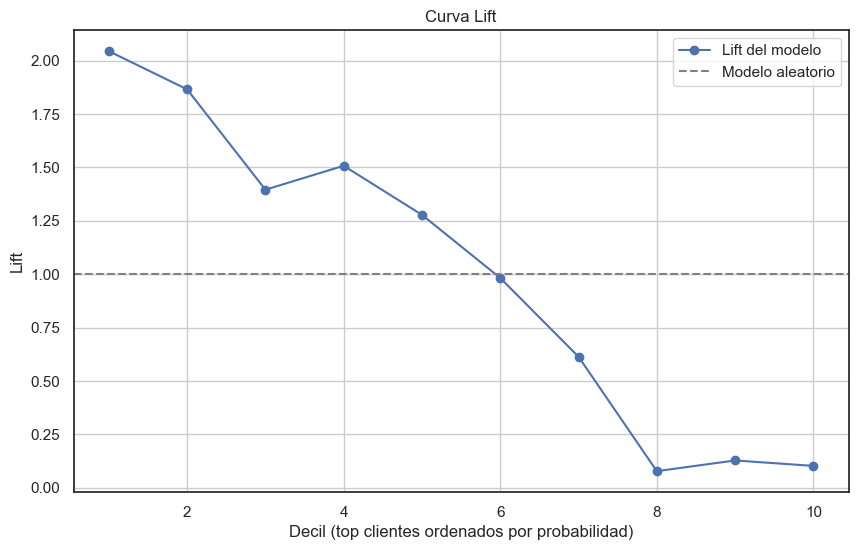

In [156]:
# Crear DataFrame con probabilidades y valores reales
lift_df = pd.DataFrame({
    "proba": probs[:, 1],
    "churn_real": y_test.values
})

# Ordenar descendentemente por probabilidad
lift_df = lift_df.sort_values(by="proba", ascending=False).reset_index(drop=True)

# Dividir en deciles (10 grupos iguales)
lift_df["decil"] = pd.qcut(lift_df.index, 10, labels=False)

# Tasa de churn real por decil
tasa_por_decil = lift_df.groupby("decil")["churn_real"].mean()

# Línea base (modelo aleatorio)
baseline = lift_df["churn_real"].mean()

# Calcular Lift
lift = tasa_por_decil / baseline

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), lift.values, marker="o", label="Lift del modelo")
plt.axhline(1, color="gray", linestyle="--", label="Modelo aleatorio")

plt.xlabel("Decil (top clientes ordenados por probabilidad)")
plt.ylabel("Lift")
plt.title("Curva Lift")
plt.legend()
plt.grid(True)
plt.show()

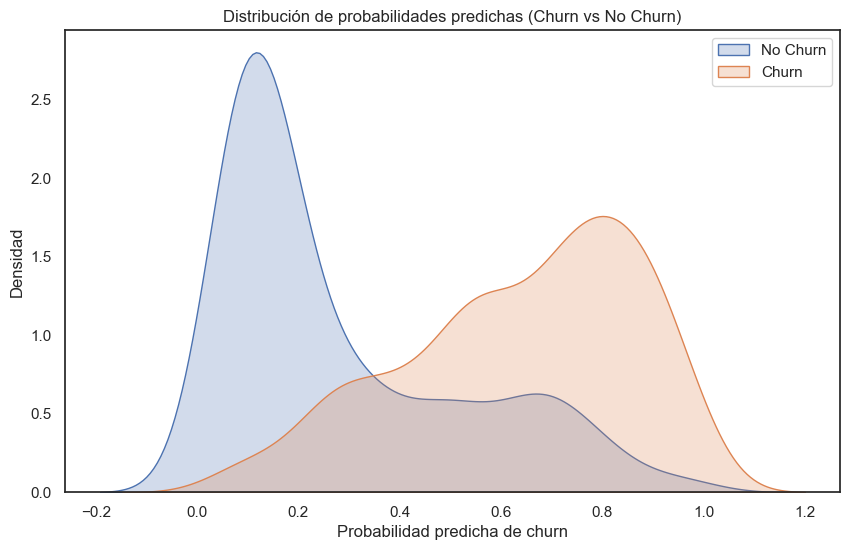

In [157]:
# Vamos a hacer un grafico de densidad
plt.figure(figsize=(10, 6))

sns.kdeplot(probs[y_test == 0, 1], fill=True, label="No Churn")
sns.kdeplot(probs[y_test == 1, 1], fill=True, label="Churn")

plt.xlabel("Probabilidad predicha de churn")
plt.ylabel("Densidad")
plt.title("Distribución de probabilidades predichas (Churn vs No Churn)")
plt.legend()
plt.show()

## 6. Análisis tipo “what-if”

In [158]:
# Sacamos el coeficiente beta asociado a la variable age que ya habíamos calculado antes
beta_age = coef_df.loc[coef_df["Variable"] == "age", "Coeficiente B"].values[0]
print(beta_age)

0.2364082705406891


In [159]:
# Sacamos las probabilidades predichas en el conjunto de test
probs_test = final_model.predict_proba(X_test)[:, 1]

# Buscamos la primera probabilidad menor al 10%
idx = np.where(probs_test < 0.10)[0][0]
print("Posicion:", idx,"\nValor:",probs_test[idx])

Posicion: 1 
Valor: 0.08776454252249566


In [160]:
# Sacamos los datos del cliente correspondiente a esa posición
cliente = X_test.iloc[idx].copy()
cliente

longdist         -0.251951
internat         -0.374036
local             0.025146
int_disc          0.000000
billtype          1.000000
age               0.194324
gender            0.000000
marital           1.000000
children          2.000000
est_inco          1.540391
car               0.000000
pay_Bank          0.000000
pay_CreditCard    1.000000
pay_Cash          0.000000
Name: 2347, dtype: float64

In [161]:
# Modificamos la edad del cliente
cliente_mod = cliente.copy()
cliente_mod["age"] = cliente_mod["age"] + 2   # +2 unidades EN LA ESCALA STANDARD
cliente_mod

longdist         -0.251951
internat         -0.374036
local             0.025146
int_disc          0.000000
billtype          1.000000
age               2.194324
gender            0.000000
marital           1.000000
children          2.000000
est_inco          1.540391
car               0.000000
pay_Bank          0.000000
pay_CreditCard    1.000000
pay_Cash          0.000000
Name: 2347, dtype: float64

In [162]:
# Vemos la probabilidad del cliente original y del modificado
cols = X_train.columns  

df_cliente = pd.DataFrame([cliente], columns=cols)
df_cliente_mod = pd.DataFrame([cliente_mod], columns=cols)

proba_original = final_model.predict_proba(df_cliente)[0][1]
proba_modificada = final_model.predict_proba(df_cliente_mod)[0][1]

print("Probabilidad original:", proba_original, "\nProbabilidad modificada:", proba_modificada)

Probabilidad original: 0.08776454252249566 
Probabilidad modificada: 0.13372418219216295


In [163]:
# Calculamos los odds y los comparamos con el valor teórico
odds_original = proba_original / (1 - proba_original)
odds_modificado = proba_modificada / (1 - proba_modificada)

odds_teorico = odds_original * np.exp(2 * beta_age)

odds_original, odds_modificado, odds_teorico

print(odds_modificado)
print(odds_teorico)

0.1543667495308365
0.15436674953083648


## 7. Predicciones

In [164]:
# Operaciones por umbral
def df_por_umbral(umbral):

    df = pd.DataFrame({
        "proba_0": probs[:, 0],
        "proba_1": probs[:, 1],
        "real": y_test.values
    })

    # Añadimos la predicción según el umbral
    df["prediction"] = (df["proba_1"] >= umbral).astype(int)

    # Comprobamos si la predicción es correcta
    df["prediction_correct"] = (df["prediction"] == df["real"]).astype(int)

    return df


#Umbral a cambiar
umbral = 0.8

df_resultado = df_por_umbral(umbral)
df_resultado.head(25)

,proba_0,proba_1,real,prediction,prediction_correct
0,0.048163,0.951837,0,1,0
1,0.912235,0.087765,0,0,1
2,0.897325,0.102675,0,0,1
3,0.108043,0.891957,1,1,1
4,0.408461,0.591539,1,0,0
5,0.226870,0.773130,1,0,0
6,0.912763,0.087237,0,0,1
7,0.807465,0.192535,0,0,1
8,0.923472,0.076528,0,0,1
9,0.979550,0.020450,0,0,1


## 8. Simulación de negocio

In [165]:
# Creamos un dataframe con probabilidades y el valor real
df_sim = pd.DataFrame({
    "proba_1": probs[:, 1],
    "real": y_test.values
})

# Ordenamos por probabilidad de churn descendente
df_sim = df_sim.sort_values(by="proba_1", ascending=False)

# Seleccionamos los 10 clientes con mayor probabilidad de churn
top_10 = df_sim.head(10)

# Contamos cuántos realmente hicieron churn
churn_reales = top_10["real"].sum()

print("🔎 Top 10 clientes con mayor probabilidad de churn:")
display(top_10)

print(f"\nClientes en los que enviamos cupón: 10")
print(f"Clientes que realmente hicieron churn: {churn_reales}")
print(f"Precisión de la acción de negocio: {churn_reales}/10 = {churn_reales/10:.2f}")

🔎 Top 10 clientes con mayor probabilidad de churn:


,proba_1,real
494,0.991303,0
248,0.991004,1
813,0.991004,1
67,0.990410,1
453,0.986242,1
426,0.984962,1
300,0.984962,1
345,0.984654,1
336,0.984654,1
581,0.984176,1



Clientes en los que enviamos cupón: 10
Clientes que realmente hicieron churn: 9
Precisión de la acción de negocio: 9/10 = 0.90
